In [2]:
import pandas as pd

# Loading the Datasets

In [28]:
cpu_data = pd.read_csv("DATA/CPU index.csv")
vix_data = pd.read_csv("DATA/_VIX (1).csv")
BTC_data = pd.read_csv("DATA/BTC-USD.csv")
co2_data = pd.read_csv('DATA/CO2-emission.csv')
electricity_consumption_data = pd.read_csv('DATA/Electricity-Consumption-AVG.csv')

# Cleaning the Data

In [103]:
cpu_data.head()

,date,cpu_index,old_cpu_index
0,Apr-87,43.589069,NaN
1,May-87,41.862022,NaN
2,Jun-87,71.135203,NaN
3,Jul-87,53.756704,NaN
4,Aug-87,60.615545,NaN


In [104]:

vix_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/1/2014,18.570000,21.480000,13.44,14.00,14.00,0.0
1,3/1/2014,16.469999,18.219999,13.46,13.88,13.88,0.0
2,4/1/2014,13.430000,17.850000,12.60,13.41,13.41,0.0
3,5/1/2014,13.640000,14.490000,11.32,11.40,11.40,0.0
4,6/1/2014,11.690000,12.890000,10.34,11.57,11.57,0.0


In [105]:
BTC_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,411.697998,289.295990,338.321014,338.321014,902994450
1,2014-11-01,338.649994,457.092987,320.626007,378.046997,378.046997,659733360
2,2014-12-01,378.248993,384.037994,304.231995,320.192993,320.192993,553102310
3,2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
4,2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700


In [4]:
co2_data.head()

,Date and Time,"Emission intensity, gCO2e/kWh"
0,2010-07-17T21:00:00,554.121479
1,2010-07-18T21:00:00,554.121479
2,2010-07-19T21:00:00,554.121479
3,2010-07-20T21:00:00,554.121479
4,2010-07-21T21:00:00,554.121479


In [7]:
electricity_consumption_data.head()

,Month,"Monthly consumption, TWh","Cumulative consumption, TWh"
0,Jul-10,0.0000,0.0000
1,Aug-10,0.0000,0.0001
2,Sep-10,0.0001,0.0001
3,Oct-10,0.0002,0.0003
4,Nov-10,0.0003,0.0006


Droping unwanted columns from datasets

In [29]:
BTC_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
cpu_data.drop('old_cpu_index', axis=1, inplace=True)
vix_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
electricity_consumption_data.drop(['Cumulative consumption, TWh'],axis=1, inplace=True)

Checking for null values

In [30]:
print('CPU DATA :',cpu_data.isnull().sum())
print('VIX DATA :',vix_data.isnull().sum())
print('BTC DATA :',BTC_data.isnull().sum())
print('CO2 DATA :',co2_data.isnull().sum())
print('ELECTRICITY DATA :',electricity_consumption_data.isnull().sum())

CPU DATA : date         0
cpu_index    0
dtype: int64
VIX DATA : Date     0
Close    6
dtype: int64
BTC DATA : Date     0
Close    0
dtype: int64
CO2 DATA : Date and Time                    0
Emission intensity, gCO2e/kWh    0
dtype: int64
ELECTRICITY DATA : Month                       0
Monthly consumption, TWh    0
dtype: int64


Droping null values from vix_data

In [31]:
vix_data.dropna(inplace=True)


In [32]:
vix_data.isnull().sum()

Date     0
Close    0
dtype: int64

Setting the name for the date column to "Date"  for each dataset. 

In [33]:
cpu_data.rename(columns={'date': 'Date'}, inplace=True)
co2_data.rename(columns={'Date and Time': 'Date'}, inplace=True)
electricity_consumption_data.rename(columns={'Month': 'Date'}, inplace=True)

# Converting date colums to datetime format.

In [40]:
vix_data['Date'] = pd.to_datetime(vix_data['Date'],format='%y-%b')
BTC_data['Date'] = pd.to_datetime(BTC_data['Date'],format='%y-%b')
co2_data['Date'] = pd.to_datetime(co2_data['Date'],format='%y-%b')


In [42]:
electricity_consumption_data['Date'] = pd.to_datetime(electricity_consumption_data['Date'],format='%b-%y')

The format of date in CPU index is not correct so we cannot convert CPU index date to datetime directly so we have to remove rows from the start till 329 row.

This will also help us in merging so let's select only data from 330 to 433.
Which start from OCT-14 to MAY-23.

In [47]:
cpu_data.iloc[330]  # Indexing starts from 0, so 321st row has index 320

Date            14-Oct
cpu_index    54.672738
Name: 330, dtype: object

In [48]:
cpu_data.iloc[433]

Date             23-May
cpu_index    227.940545
Name: 433, dtype: object

In [49]:
cpu_selected_data = cpu_data.loc[330:433]

In [50]:
cpu_selected_data.head(1)

,Date,cpu_index
330,14-Oct,54.672738


In [116]:
cpu_selected_data.tail(1)

,date,cpu_index
433,23-May,227.940545


Converting date from 'cpu_selected_data' to datetime.

In [51]:
cpu_selected_data['Date'] = pd.to_datetime(cpu_selected_data['Date'], format='%y-%b')

C:\Users\Idris Khan\AppData\Local\Temp\ipykernel_13240\1873947492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_selected_data['Date'] = pd.to_datetime(cpu_selected_data['Date'], format='%y-%b')


Setting Date as an index for all the datasets.

In [52]:
vix_data.set_index('Date', inplace=True)
BTC_data.set_index('Date', inplace=True)
cpu_selected_data.set_index('Date',inplace=True)
co2_data.set_index('Date', inplace=True)
electricity_consumption_data.set_index('Date',inplace=True)

Let's also do some cleaning with other datasets and remove rows so that all datasets align with each other.

 This will help ensure that the datasets cover the same time period, making the analysis more consistent and meaningful.

BTC dataset start from '2014-10-01' and end on '2023-10-1' so we will select from the start till the '2023-05-01'

In [55]:

BTC_data_selected = BTC_data.loc[:'2023-05-01']

VIX dataset start from '2014-02-01' and end on '2023-05-01' so we will select data from '2014-10-01' till the end

In [56]:
vix_data_selected = vix_data.loc['2014-10-01':]

CO2 and Electricity datasets are large so we just have to select from [2014-10-01] to [2023-05-01]

In [57]:
co2_data_selected = co2_data.loc['2014-10-01':'2023-05-01']
electricity_selected = electricity_consumption_data.loc['2014-10-01':'2023-05-01']

In [67]:
co2_data_selected.head()

,"Emission intensity, gCO2e/kWh"
Date,
2014-10-31,554.532145
2014-11-30,554.532145
2014-12-31,554.129503
2015-01-31,542.050238
2015-02-28,542.050238


CO2 have daily basis data so we have to Group data by month and calculate the mean for each month.

In [65]:
co2_data_selected = co2_data_selected.groupby(pd.Grouper(freq='M')).mean()

In [66]:
print('vix_data_selected shape is', vix_data_selected.shape)
print('BTC_data_selected shape is', BTC_data_selected.shape)
print('cpu_data_selected shape is', cpu_selected_data.shape)
print('co2_data_selected shape is', co2_data_selected.shape)
print('electricity_selected shape is', electricity_selected.shape)

vix_data_selected shape is (104, 1)
BTC_data_selected shape is (104, 1)
cpu_data_selected shape is (104, 1)
co2_data_selected shape is (104, 1)
electricity_selected shape is (104, 1)


In [125]:
cpu_selected_data.head(1)

,cpu_index
Date,
2014-10-01,54.672738


# The data is ready now let's merge them

In [127]:
# Merge CPU data with VIX data
merged_data = pd.merge(cpu_selected_data, vix_data_selected, on='Date', how='inner')

# Merge the resulting dataframe with Bitcoin data
merged_data = pd.merge(merged_data, BTC_data_selected, on='Date', how='inner')


In [129]:
merged_data.shape

(104, 3)

In [135]:
merged_data.columns

Index(['cpu_index', 'Close_x', 'Close_y'], dtype='object')

In [137]:
merged_data.rename(columns={'Close_x': 'VIX_Close', 'Close_y': 'BTC_Close'}, inplace=True)

In [138]:
merged_data.columns

Index(['cpu_index', 'VIX_Close', 'BTC_Close'], dtype='object')

In [140]:
merged_data.to_csv('DATA/CPU+VIX+BTC.csv')

In [142]:
merged_data.corr()

,cpu_index,VIX_Close,BTC_Close
cpu_index,1.000000,0.337834,0.477942
VIX_Close,0.337834,1.000000,0.294896
BTC_Close,0.477942,0.294896,1.000000


In [1]:
corr = merged_data.corr()

NameError: name 'merged_data' is not defined

In [145]:
corr.to_csv('DATA/CPU+VIX+BTC_Corr.csv')

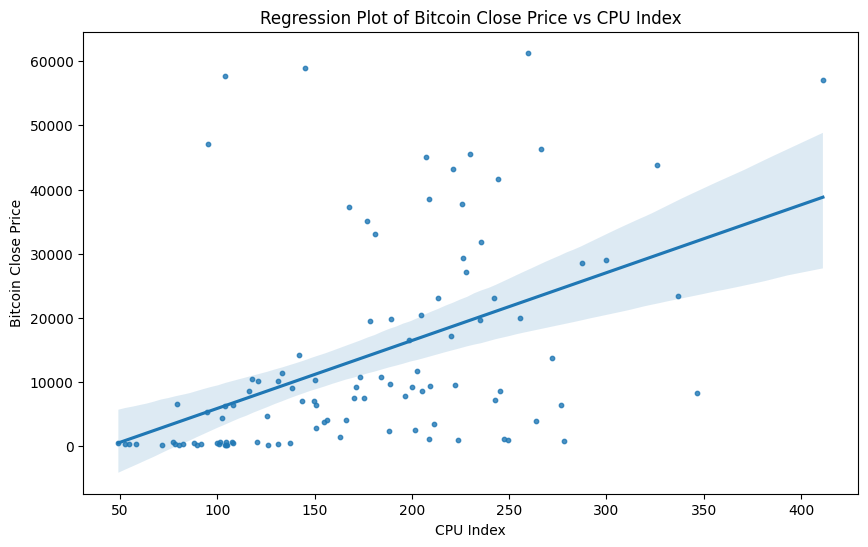

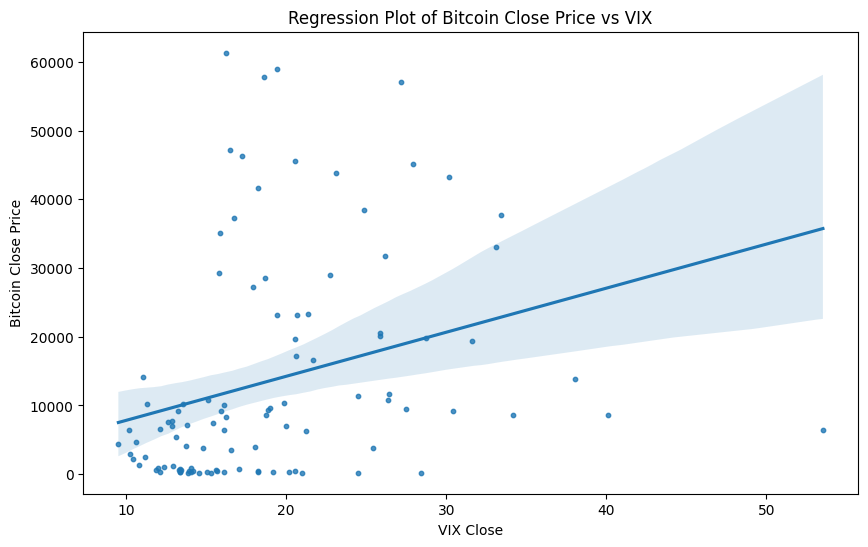

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot for BTC and CPU
plt.figure(figsize=(10, 6))
sns.regplot(x='cpu_index', y='BTC_Close', data=merged_data, scatter_kws={'s': 10})
plt.xlabel('CPU Index')
plt.ylabel('Bitcoin Close Price')
plt.title('Regression Plot of Bitcoin Close Price vs CPU Index')
plt.show()

# Create a regression plot for BTC and VIX
plt.figure(figsize=(10, 6))
sns.regplot(x='VIX_Close', y='BTC_Close', data=merged_data, scatter_kws={'s': 10})
plt.xlabel('VIX Close')
plt.ylabel('Bitcoin Close Price')
plt.title('Regression Plot of Bitcoin Close Price vs VIX')
plt.show()
